## ORDINARY LEAST MEAN SQUARE METHOD

In [33]:
# IMPORTING NECESSARY LIBRARIES
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['figure.figsize']=(20.0,10.0)
# reading data
data=pd.read_csv('C:/Users/KARTHIK.G/Downloads/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [34]:
type(data)

pandas.core.frame.DataFrame

In [35]:
# collecting X and Y 
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

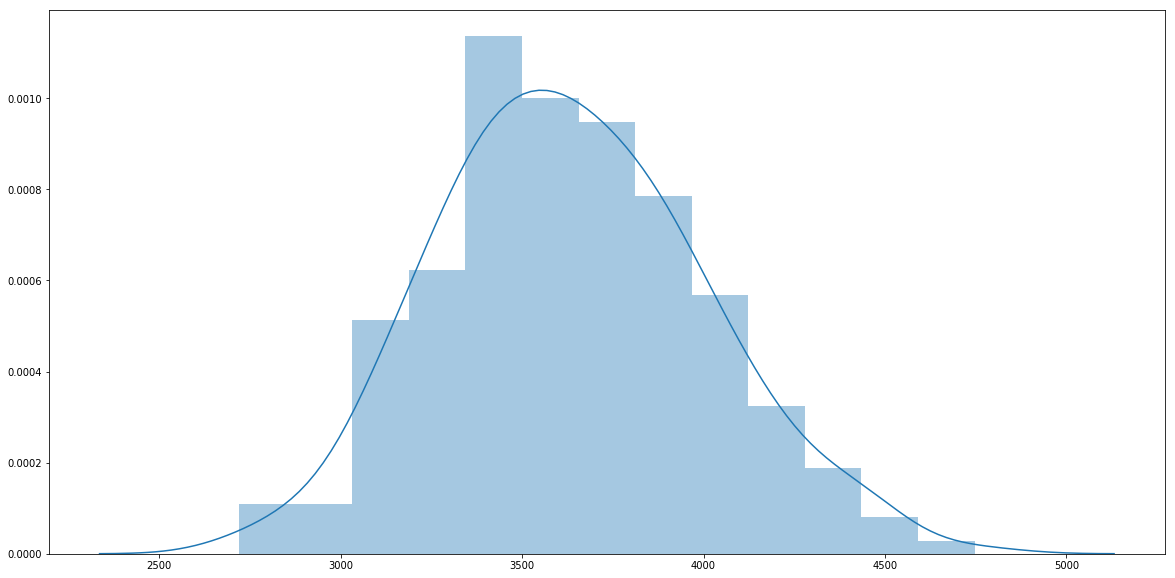

In [36]:
sb.distplot(X)

In [37]:
data['Head Size(cm^3)'].skew()

0.2388065848891712

In [38]:
data['Head Size(cm^3)'].kurt()

-0.1134564707717618

In [39]:
data['Head Size(cm^3)'].describe()

count     237.000000
mean     3633.991561
std       365.261422
min      2720.000000
25%      3389.000000
50%      3614.000000
75%      3876.000000
max      4747.000000
Name: Head Size(cm^3), dtype: float64

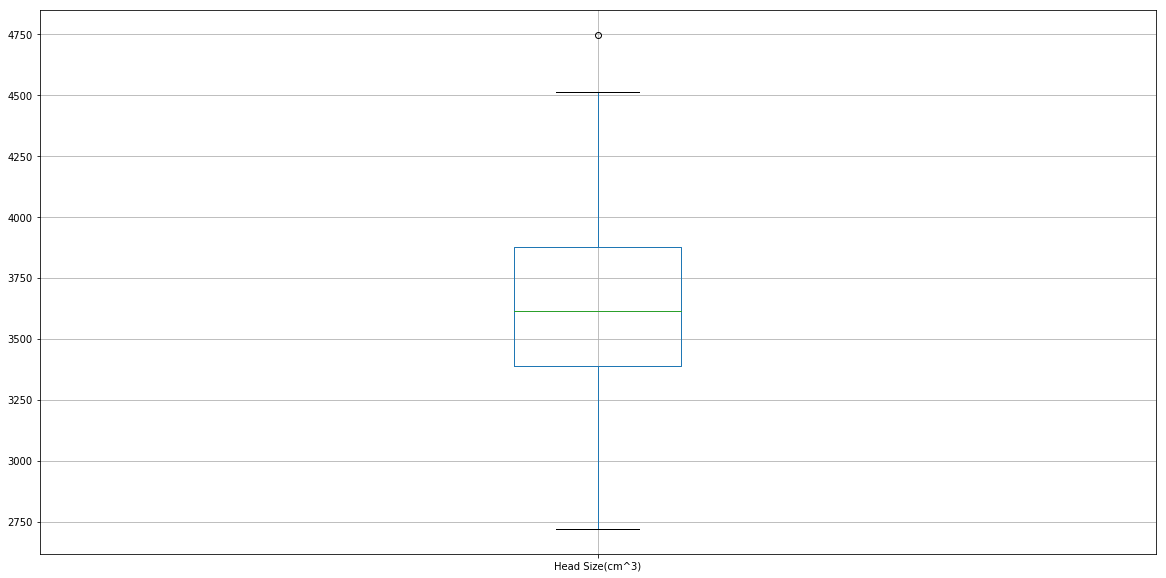

In [40]:
data.boxplot(column="Head Size(cm^3)")

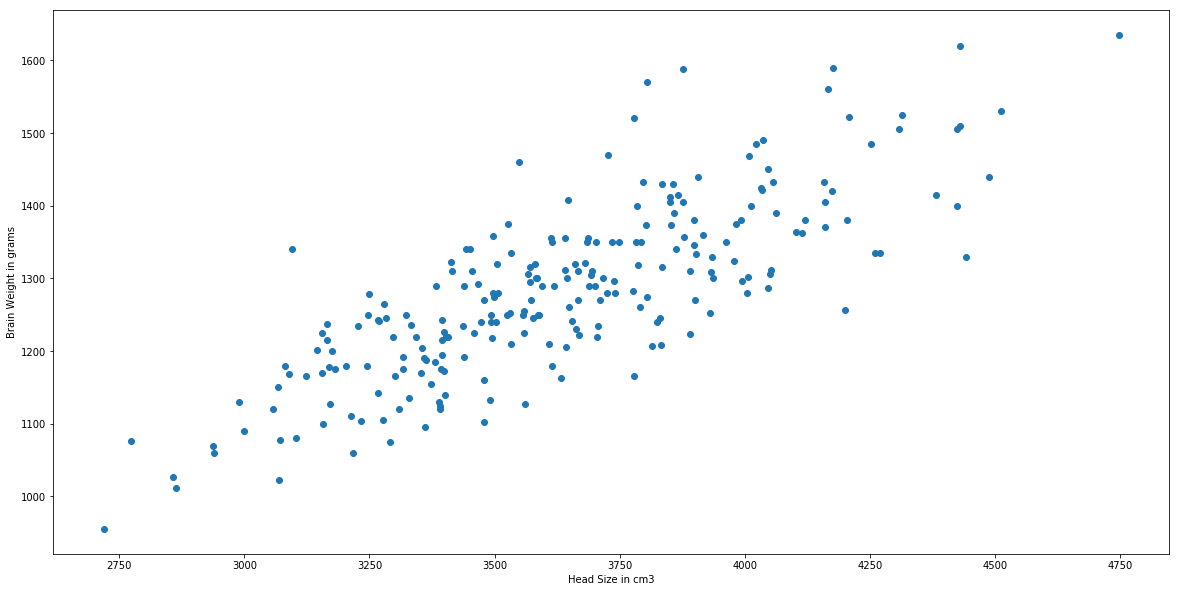

In [41]:
plt.scatter(X,Y)
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.show()

In [42]:
np.corrcoef(X,Y)[0,1]

0.7995697092542962

In [43]:
import scipy.stats as stats
stats.pearsonr(X,Y)

(0.7995697092542964, 5.957630839405754e-54)

In [44]:
# Y=bo + b1X
# mean X and Y
mean_X=np.mean(X)
mean_Y=np.mean(Y)
# total no of values
m=len(X)
# using the formula to calculate b1 and b2
numer=0
denom=0
for i in range(m):
    numer+=(X[i]-mean_X)*(Y[i]-mean_Y)
    denom+=(X[i]-mean_X)**2
    b1=numer/denom
    b0=mean_Y-(b1*mean_X)
# print coefficients
print(b1,b0)

0.26342933948939945 325.57342104944223


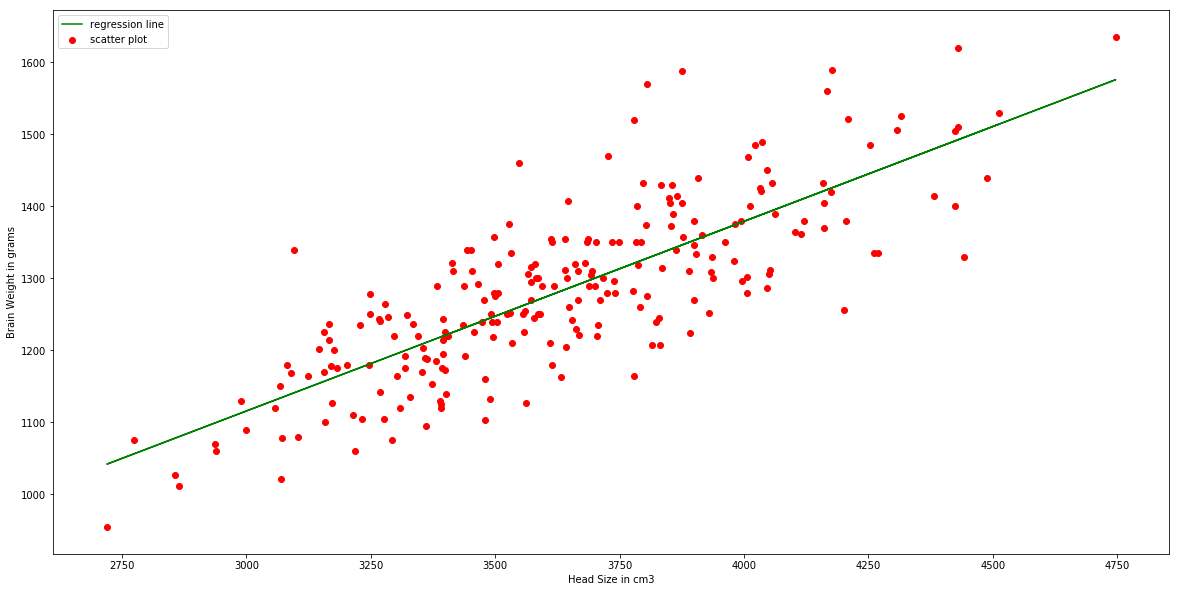

In [45]:
# plotting values and regression line
Y_pred=b0+b1*X
# plotting line
plt.plot(X,Y_pred,c='green',label='regression line')
# plotting scatter points
plt.scatter(X,Y,c='red',label='scatter plot')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [46]:
# calculating root mean square error
rmse=0
for i in range(m):
    Y_pred=b0+b1*X[i]
    rmse+=(Y[i]-Y_pred)**2
rmse=np.sqrt(rmse/m)
print(rmse)

72.1206213783709


In [47]:
ss_t=0 # total sum of squaare
ss_r=0 # sum of squares of residuals
for i in range(m):
    Y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_Y)**2
    ss_r+=(Y[i]-Y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# cannot use rank 1 matrix in scikit learn
X=X.reshape((m,1))
# creating model 1
reg=LinearRegression()
# fitting trading data
reg=reg.fit(X,Y)
# Y prediction
Y_pred=reg.predict(X)
# calculating RMSE amd R2 score
mse=mean_squared_error(Y,Y_pred)
rmse=np.sqrt(mse)
r2_score=reg.score(X,Y)
print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957
